In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/parkinsons-telemonitoring/Parkinsons-Telemonitoring-ucirvine.csv


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/kaggle/input/parkinsons-telemonitoring/Parkinsons-Telemonitoring-ucirvine.csv")

In [4]:
df.head()

,subject,age,sex,test_time,motor_updrs,total_updrs,jitter,jitter_abs,jitter_rap,jitter_ppq5,...,shimmer_db,shimmer_apq3,shimmer_apq5,shimmer_apq11,shimmer_dda,nhr,hnr,rpde,dfa,ppe
0,1,72,False,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,False,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,False,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,False,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,False,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [5]:
df.shape

(5875, 22)

In [6]:
df.isnull().sum()

subject          0
age              0
sex              0
test_time        0
motor_updrs      0
total_updrs      0
jitter           0
jitter_abs       0
jitter_rap       0
jitter_ppq5      0
jitter_ddp       0
shimmer          0
shimmer_db       0
shimmer_apq3     0
shimmer_apq5     0
shimmer_apq11    0
shimmer_dda      0
nhr              0
hnr              0
rpde             0
dfa              0
ppe              0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject        5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   bool   
 3   test_time      5875 non-null   float64
 4   motor_updrs    5875 non-null   float64
 5   total_updrs    5875 non-null   float64
 6   jitter         5875 non-null   float64
 7   jitter_abs     5875 non-null   float64
 8   jitter_rap     5875 non-null   float64
 9   jitter_ppq5    5875 non-null   float64
 10  jitter_ddp     5875 non-null   float64
 11  shimmer        5875 non-null   float64
 12  shimmer_db     5875 non-null   float64
 13  shimmer_apq3   5875 non-null   float64
 14  shimmer_apq5   5875 non-null   float64
 15  shimmer_apq11  5875 non-null   float64
 16  shimmer_dda    5875 non-null   float64
 17  nhr            5875 non-null   float64
 18  hnr     

In [9]:
df.describe()

,subject,age,test_time,motor_updrs,total_updrs,jitter,jitter_abs,jitter_rap,jitter_ppq5,jitter_ddp,...,shimmer_db,shimmer_apq3,shimmer_apq5,shimmer_apq11,shimmer_dda,nhr,hnr,rpde,dfa,ppe
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,0.008962,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,0.009371,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,0.004730,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,0.006750,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,0.009870,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,0.172630,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [10]:
df.columns

Index(['subject', 'age', 'sex', 'test_time', 'motor_updrs', 'total_updrs',
       'jitter', 'jitter_abs', 'jitter_rap', 'jitter_ppq5', 'jitter_ddp',
       'shimmer', 'shimmer_db', 'shimmer_apq3', 'shimmer_apq5',
       'shimmer_apq11', 'shimmer_dda', 'nhr', 'hnr', 'rpde', 'dfa', 'ppe'],
      dtype='object')

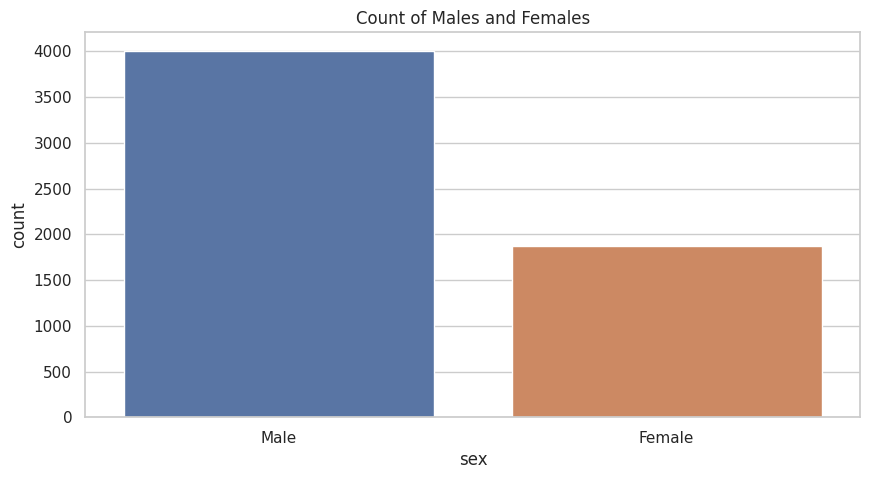

In [11]:
# Set Seaborn style
sns.set(style="whitegrid")

# Figure size
figsize = (10, 5)

### 1. Countplot - Categorical Feature 'sex'
plt.figure(figsize=figsize)
sns.countplot(x="sex", data=df)
plt.title("Count of Males and Females")
plt.xticks([0, 1], ["Male", "Female"])
plt.show()

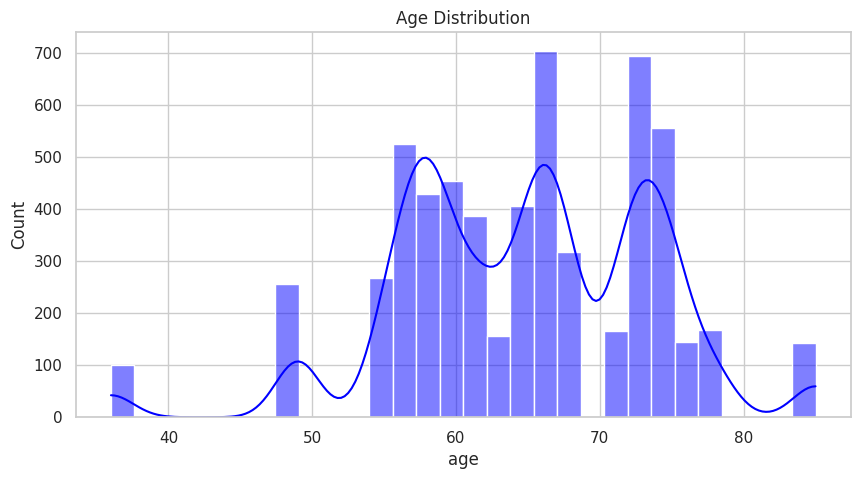

In [12]:
### 2. Histogram - Age Distribution
plt.figure(figsize=figsize)
sns.histplot(df["age"], bins=30, kde=True, color="blue")
plt.title("Age Distribution")
plt.show()

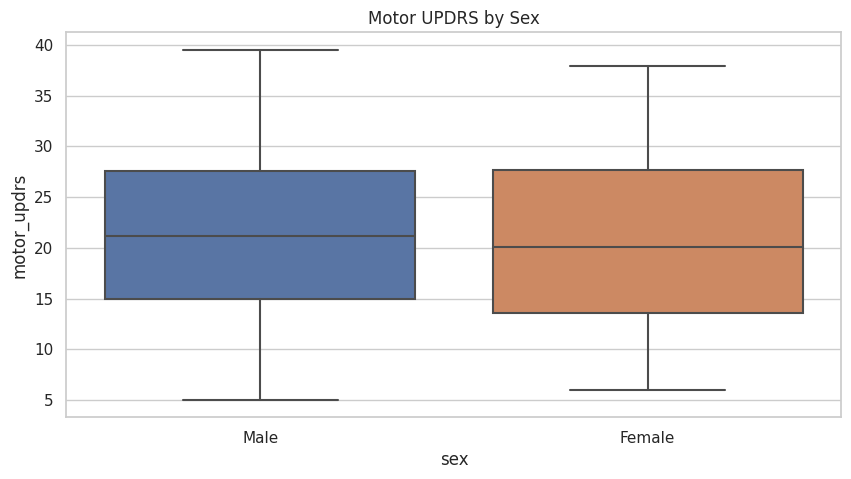

In [13]:
### 3. Boxplot - Motor UPDRS by Sex
plt.figure(figsize=figsize)
sns.boxplot(x="sex", y="motor_updrs", data=df)
plt.xticks([0, 1], ["Male", "Female"])
plt.title("Motor UPDRS by Sex")
plt.show()

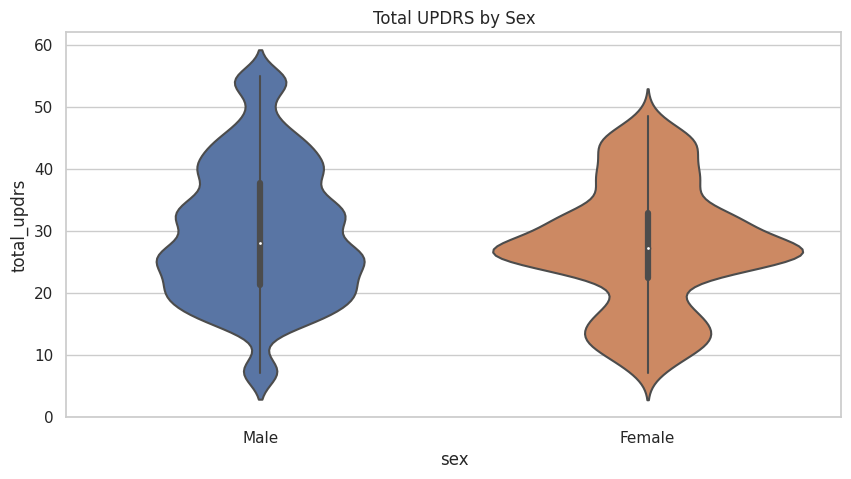

In [14]:
### 4. Violin Plot - Total UPDRS by Sex
plt.figure(figsize=figsize)
sns.violinplot(x="sex", y="total_updrs", data=df)
plt.xticks([0, 1], ["Male", "Female"])
plt.title("Total UPDRS by Sex")
plt.show()


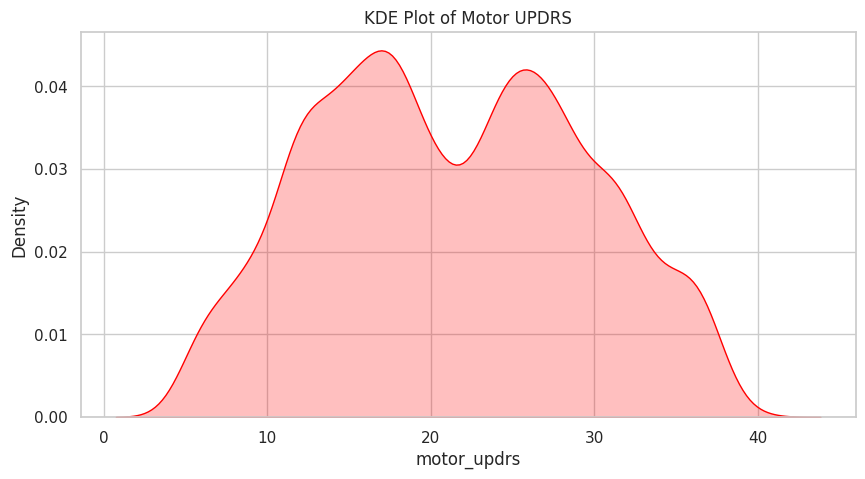

In [15]:
### 5. KDE Plot - Distribution of Motor UPDRS
plt.figure(figsize=figsize)
sns.kdeplot(df["motor_updrs"], shade=True, color="red")
plt.title("KDE Plot of Motor UPDRS")
plt.show()


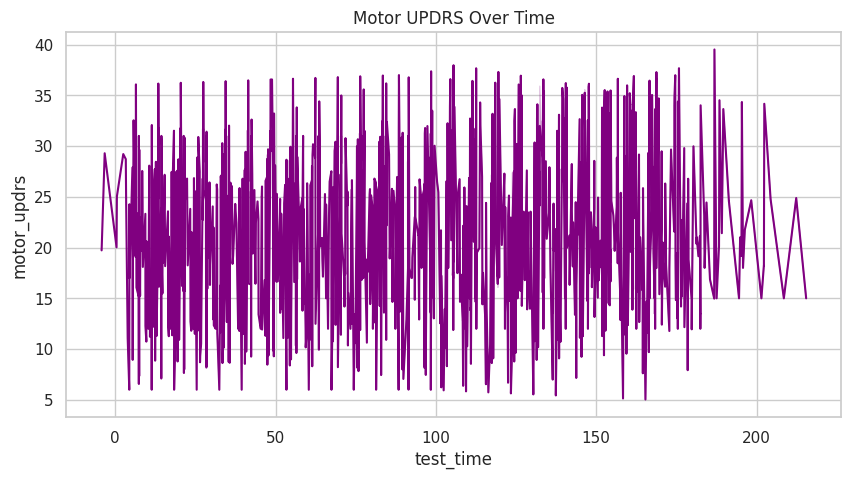

In [16]:
### 6. Line Plot - Test Time vs. Motor UPDRS
plt.figure(figsize=figsize)
sns.lineplot(x="test_time", y="motor_updrs", data=df, color="purple")
plt.title("Motor UPDRS Over Time")
plt.show()

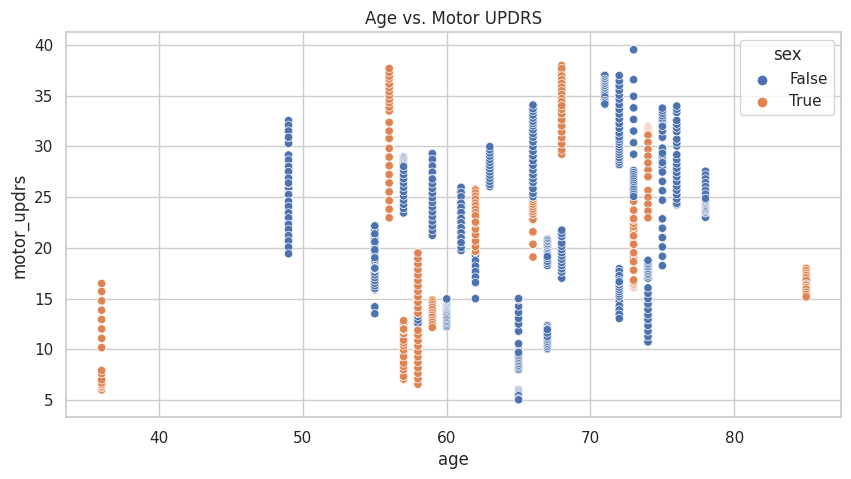

In [17]:
### 7. Scatter Plot - Age vs. Motor UPDRS
plt.figure(figsize=figsize)
sns.scatterplot(x="age", y="motor_updrs", hue="sex", data=df)
plt.title("Age vs. Motor UPDRS")
plt.show()

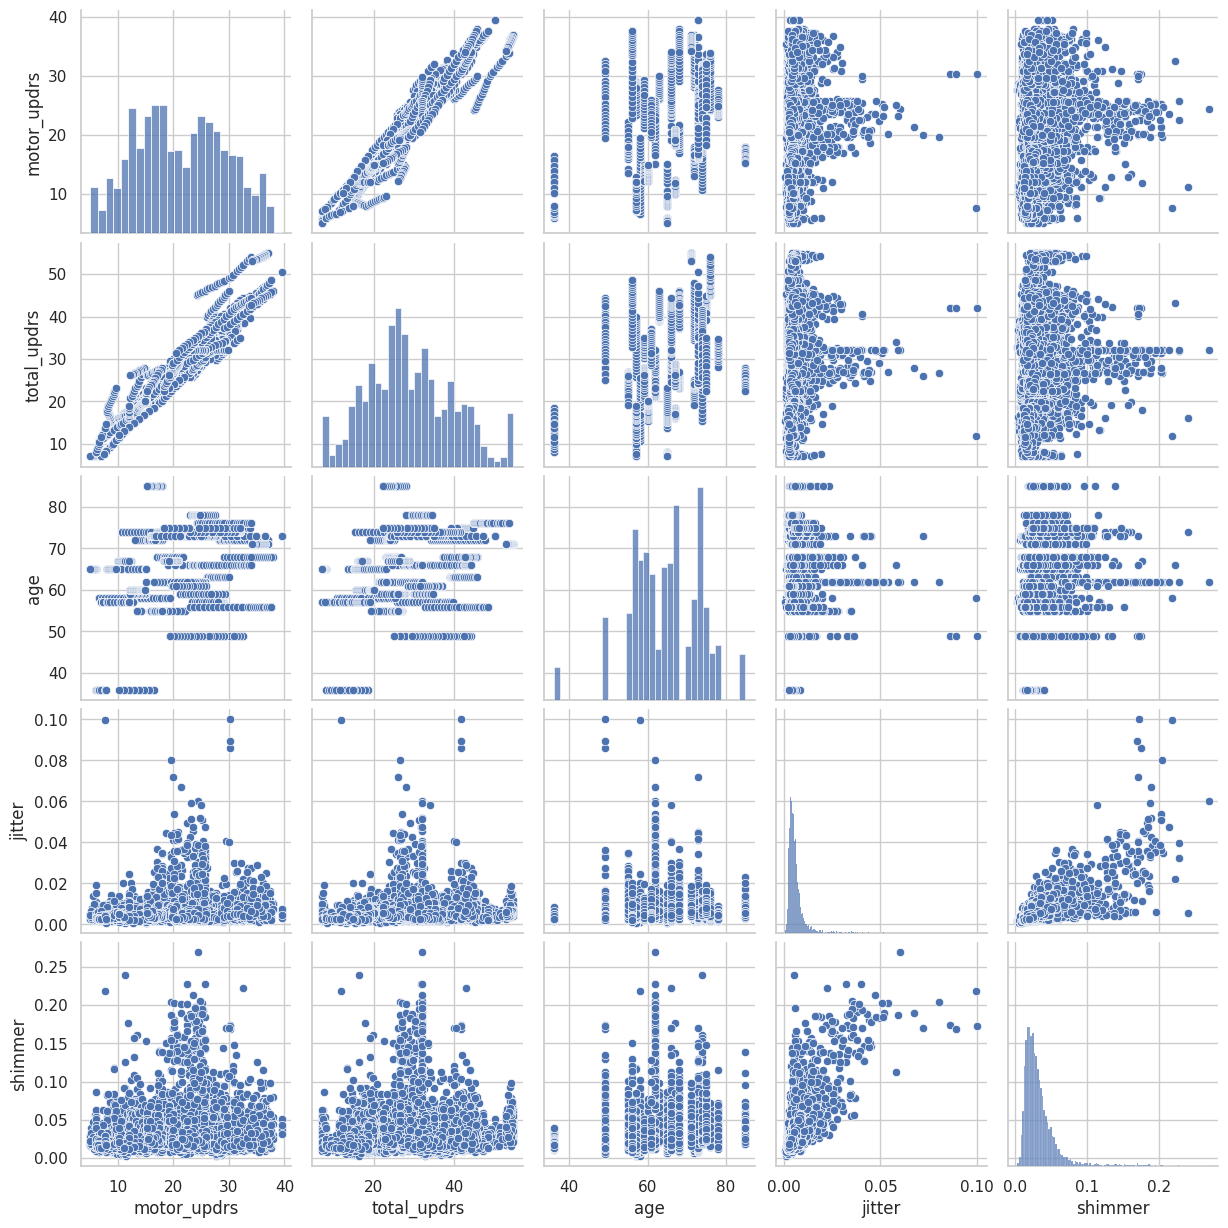

In [18]:
### 8. Pairplot - Relationship Between Important Features
sns.pairplot(df[["motor_updrs", "total_updrs", "age", "jitter", "shimmer"]], hue=None)
plt.show()


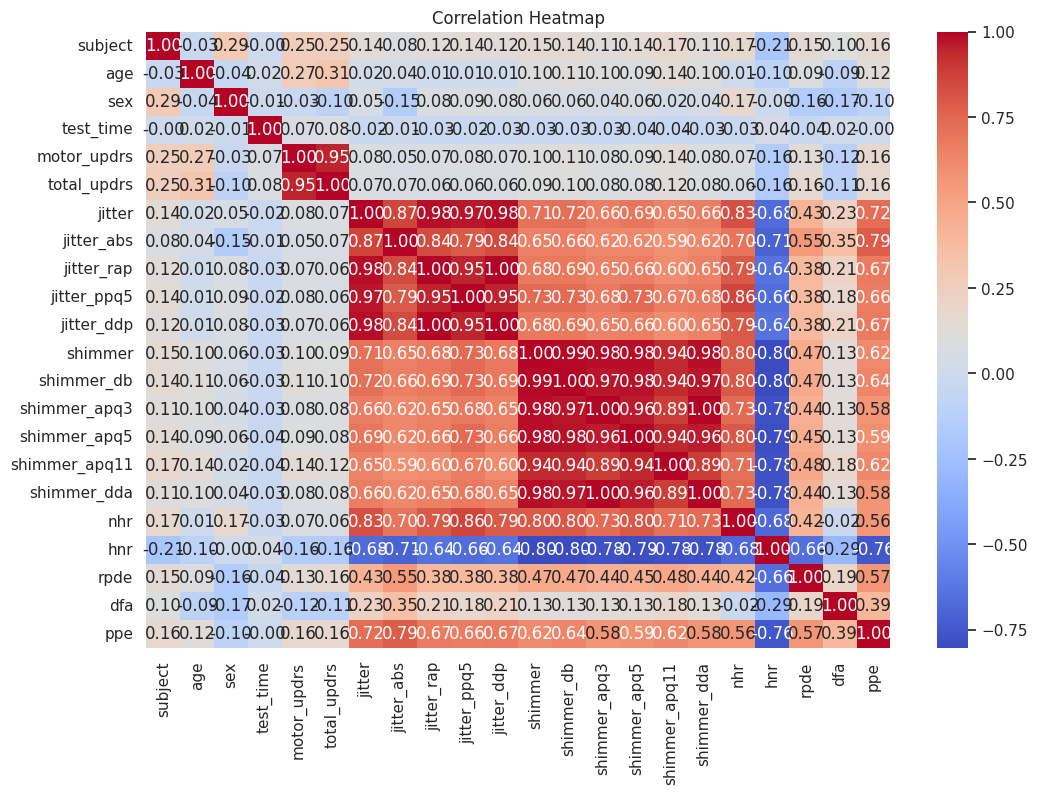

In [19]:
### 9. Heatmap - Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

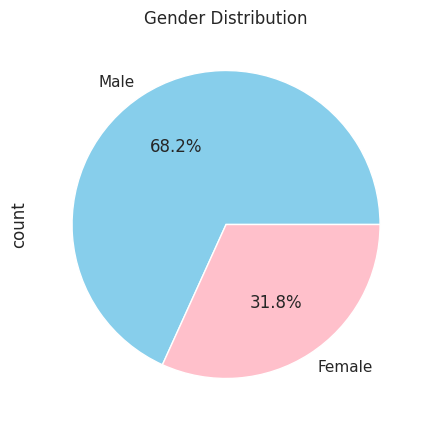

In [20]:
### 10. Pie Chart - Gender Distribution
plt.figure(figsize=figsize)
df["sex"].value_counts().plot.pie(autopct="%1.1f%%", labels=["Male", "Female"], colors=["skyblue", "pink"])
plt.title("Gender Distribution")
plt.show()

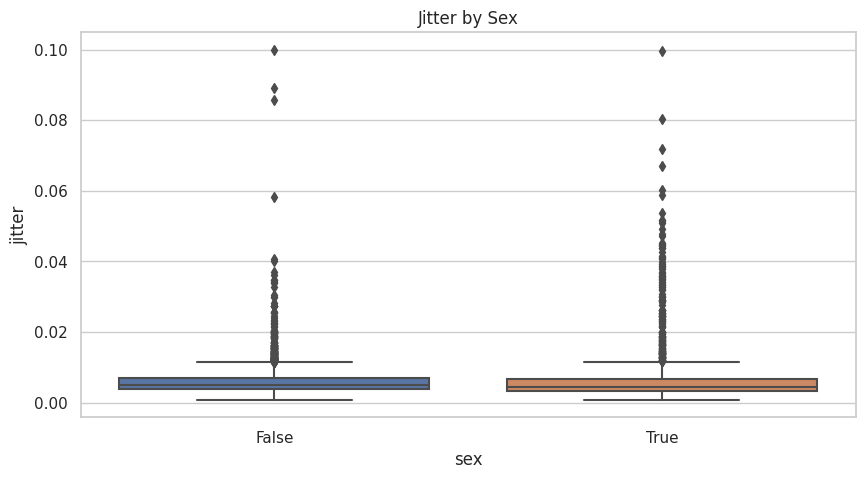

In [21]:
### 11. Boxplot - Jitter by Sex
plt.figure(figsize=figsize)
sns.boxplot(x="sex", y="jitter", data=df)
plt.title("Jitter by Sex")
plt.show()

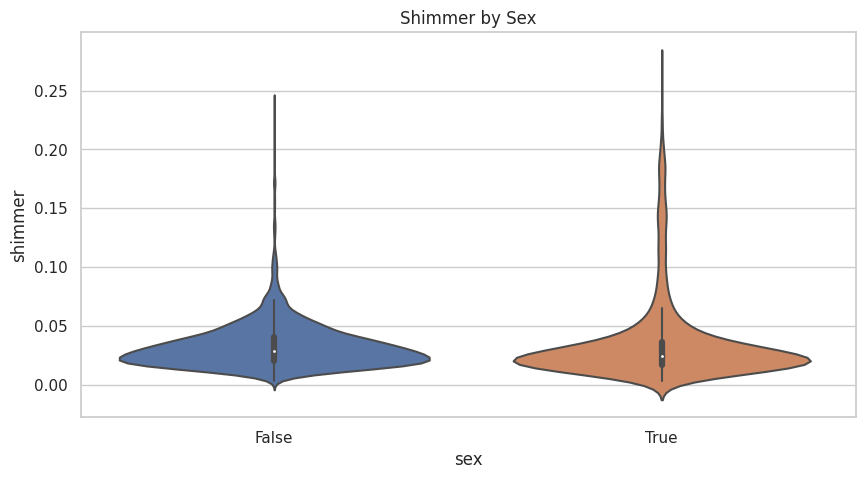

In [22]:
### 12. Violin Plot - Shimmer by Sex
plt.figure(figsize=figsize)
sns.violinplot(x="sex", y="shimmer", data=df)
plt.title("Shimmer by Sex")
plt.show()

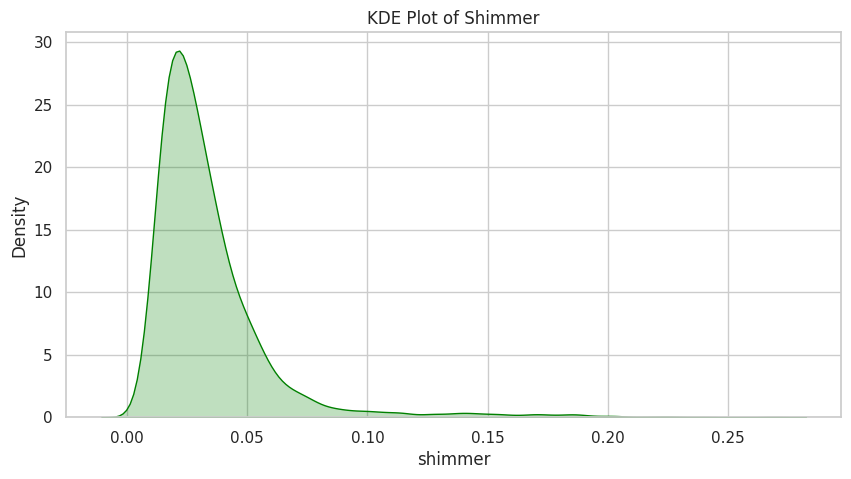

In [23]:
### 13. KDE Plot - Distribution of Shimmer
plt.figure(figsize=figsize)
sns.kdeplot(df["shimmer"], shade=True, color="green")
plt.title("KDE Plot of Shimmer")
plt.show()

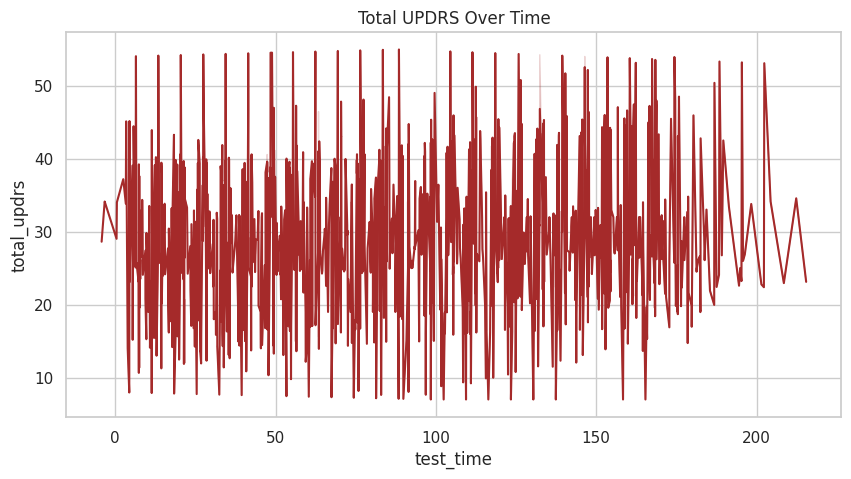

In [24]:
### 14. Line Plot - Test Time vs. Total UPDRS
plt.figure(figsize=figsize)
sns.lineplot(x="test_time", y="total_updrs", data=df, color="brown")
plt.title("Total UPDRS Over Time")
plt.show()

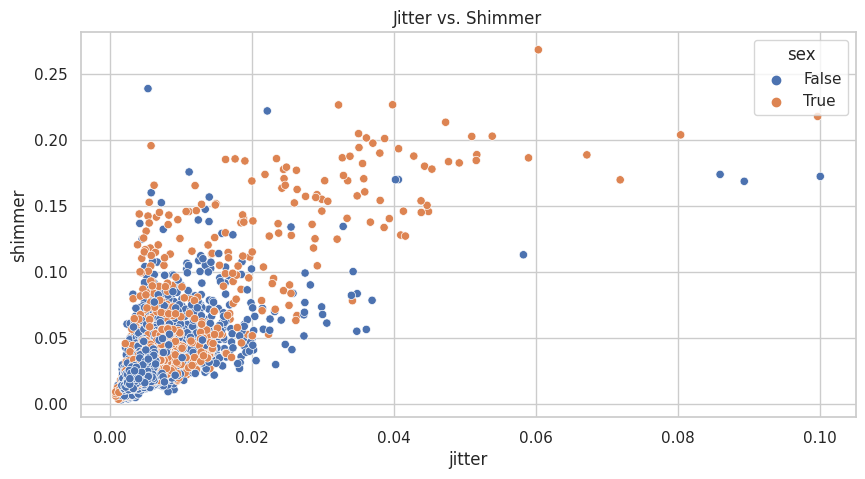

In [25]:
### 15. Scatter Plot - Jitter vs. Shimmer
plt.figure(figsize=figsize)
sns.scatterplot(x="jitter", y="shimmer", hue="sex", data=df)
plt.title("Jitter vs. Shimmer")
plt.show()

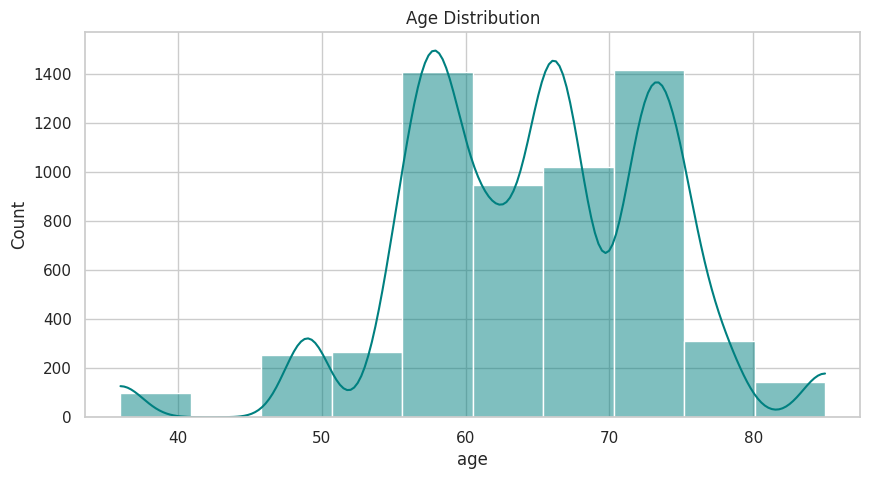

In [26]:
### 16. Countplot - Age Distribution in Bins
plt.figure(figsize=figsize)
sns.histplot(df["age"], bins=10, kde=True, color="teal")
plt.title("Age Distribution")
plt.show()

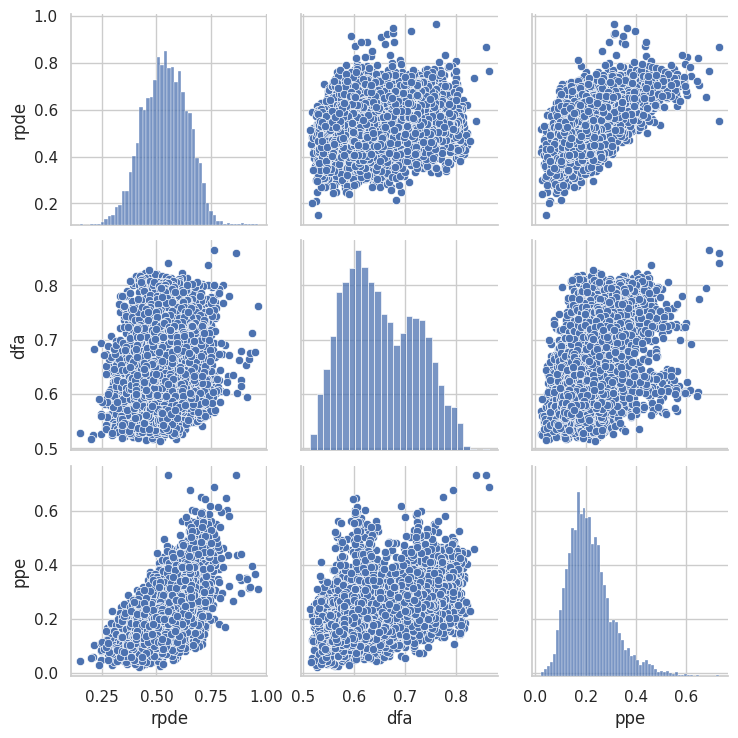

In [27]:
### 17. Pairplot - RPDE, DFA, PPE Relationships
sns.pairplot(df[["rpde", "dfa", "ppe"]])
plt.show()

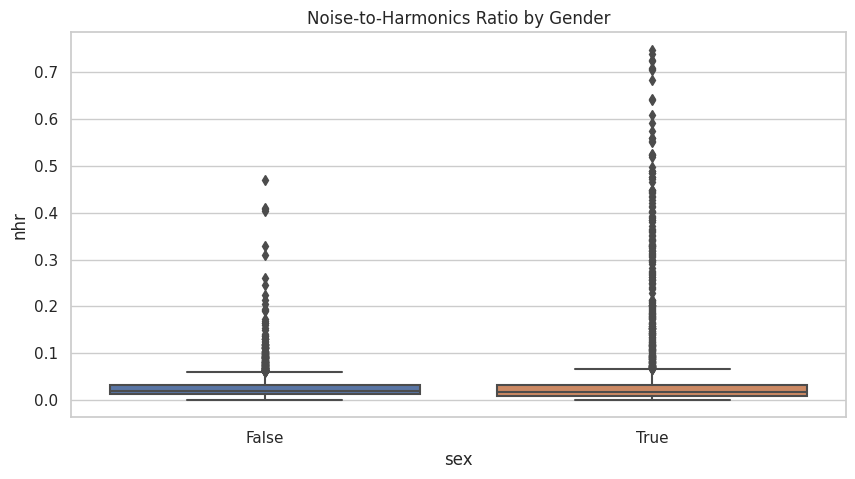

In [28]:
## 18. Boxplot - Noise-to-Harmonics Ratio by Gender
plt.figure(figsize=figsize)
sns.boxplot(x="sex", y="nhr", data=df)
plt.title("Noise-to-Harmonics Ratio by Gender")
plt.show()

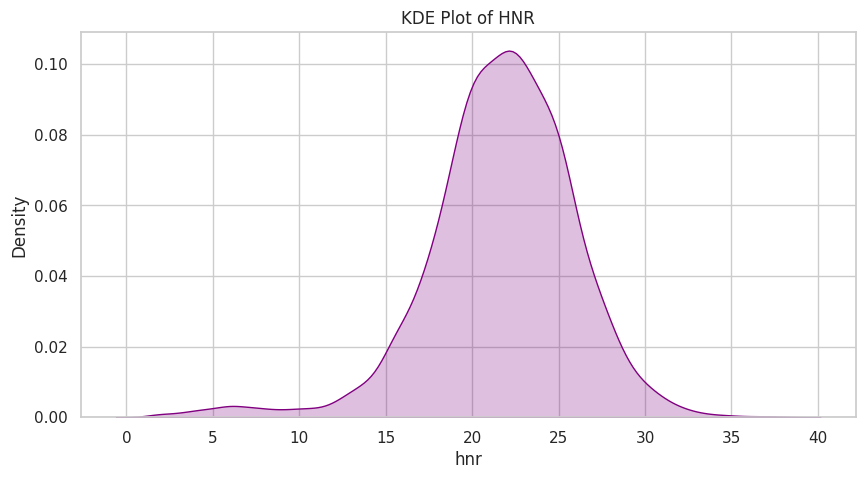

In [29]:
### 19. KDE Plot - Distribution of HNR
plt.figure(figsize=figsize)
sns.kdeplot(df["hnr"], shade=True, color="purple")
plt.title("KDE Plot of HNR")
plt.show()

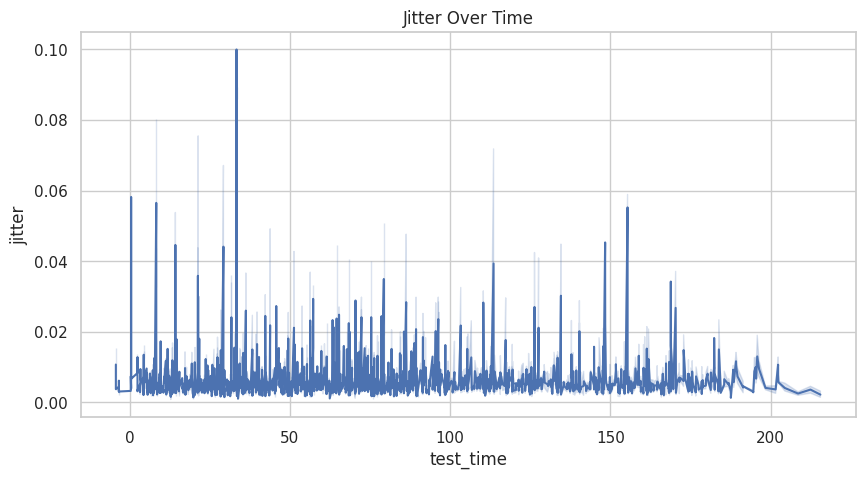

In [30]:
### 20. Line Plot - Test Time vs. Jitter
plt.figure(figsize=figsize)
sns.lineplot(x="test_time", y="jitter", data=df)
plt.title("Jitter Over Time")
plt.show()

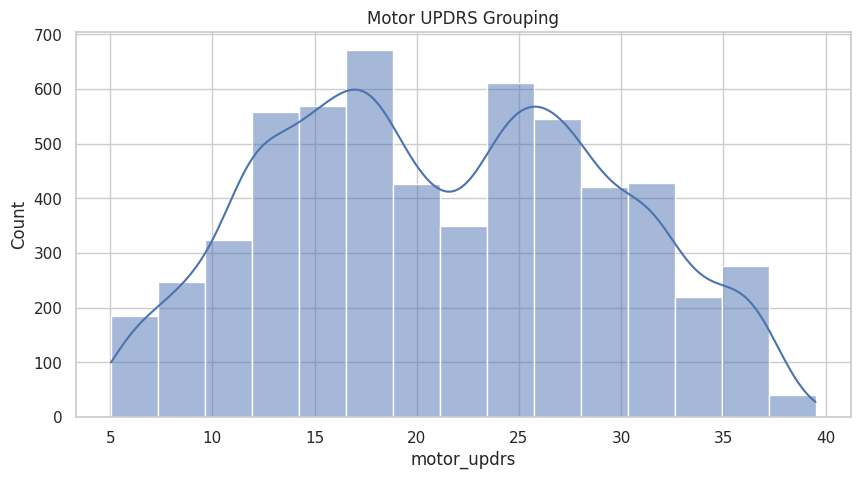

In [31]:
### 21. Countplot - UPDRS Grouping
plt.figure(figsize=figsize)
sns.histplot(df["motor_updrs"], bins=15, kde=True)
plt.title("Motor UPDRS Grouping")
plt.show()

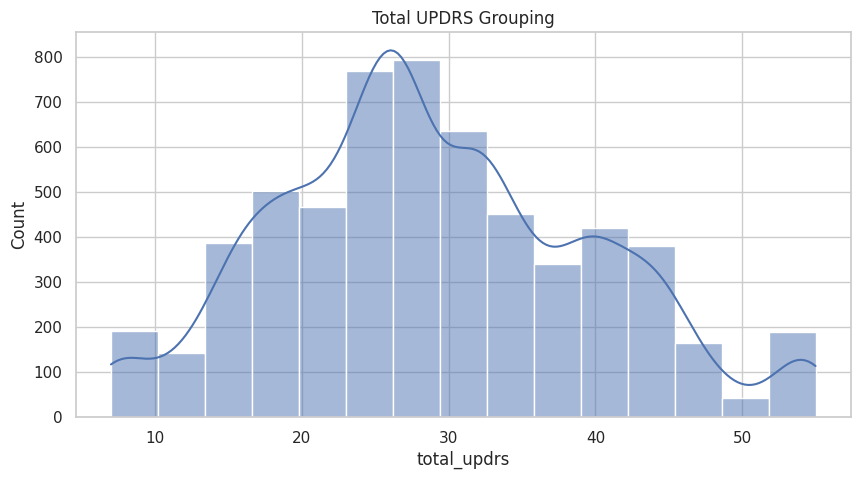

In [32]:
### 22. Countplot - UPDRS Total Grouping
plt.figure(figsize=figsize)
sns.histplot(df["total_updrs"], bins=15, kde=True)
plt.title("Total UPDRS Grouping")
plt.show()


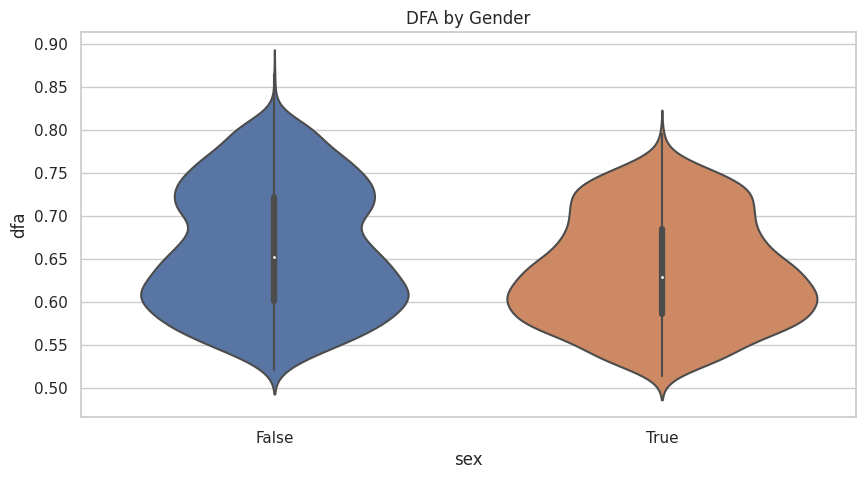

In [33]:
### 23. Violin Plot - DFA by Gender
plt.figure(figsize=figsize)
sns.violinplot(x="sex", y="dfa", data=df)
plt.title("DFA by Gender")
plt.show()

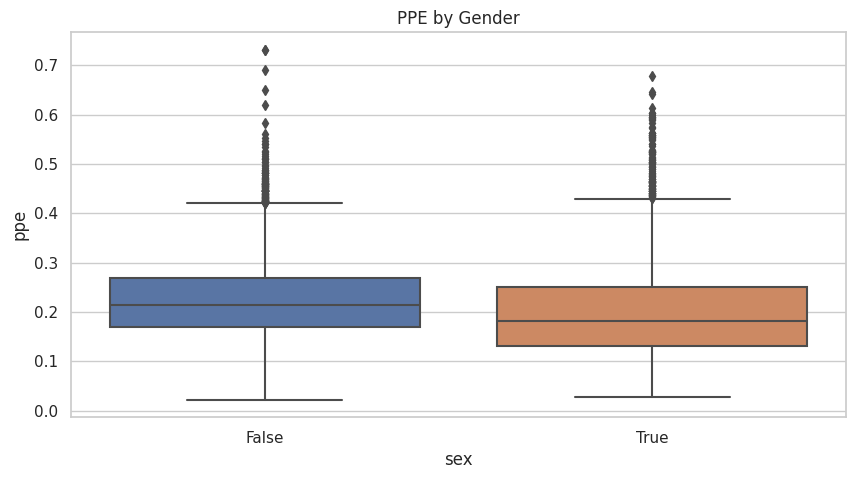

In [34]:
### 24. Boxplot - PPE by Gender
plt.figure(figsize=figsize)
sns.boxplot(x="sex", y="ppe", data=df)
plt.title("PPE by Gender")
plt.show()

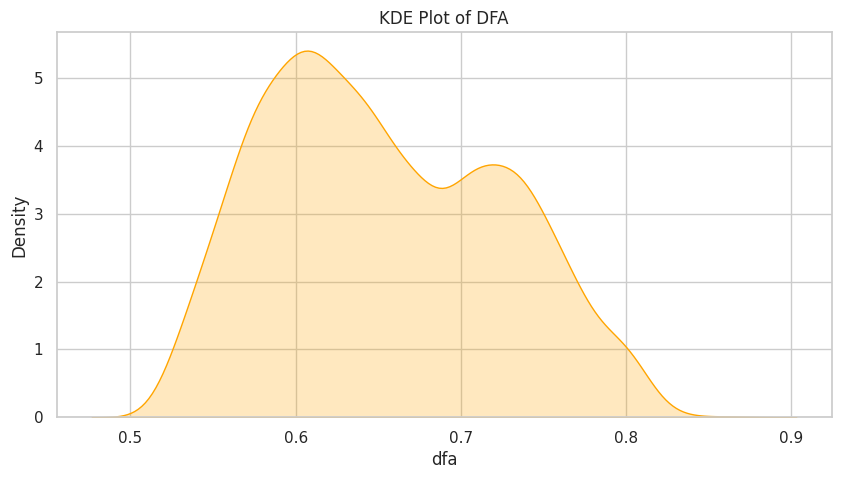

In [35]:
### 25. KDE Plot - Distribution of DFA
plt.figure(figsize=figsize)
sns.kdeplot(df["dfa"], shade=True, color="orange")
plt.title("KDE Plot of DFA")
plt.show()

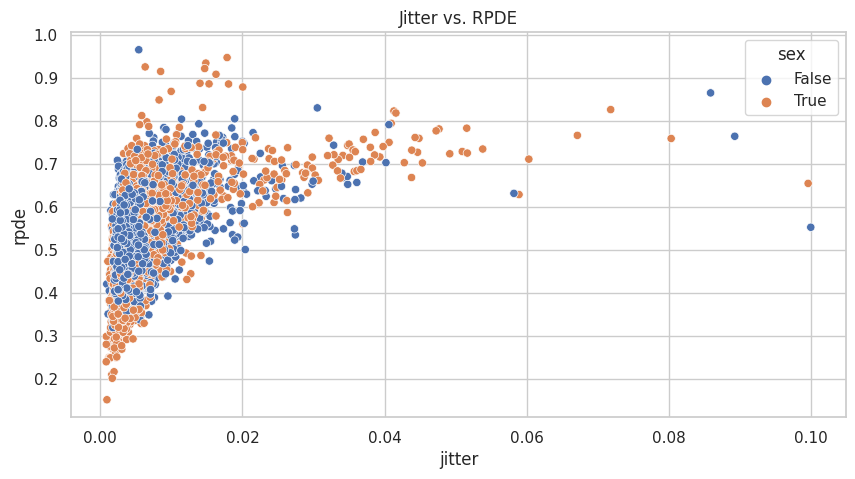

In [36]:
### 26. Scatterplot - Jitter vs. RPDE
plt.figure(figsize=figsize)
sns.scatterplot(x="jitter", y="rpde", hue="sex", data=df)
plt.title("Jitter vs. RPDE")
plt.show()

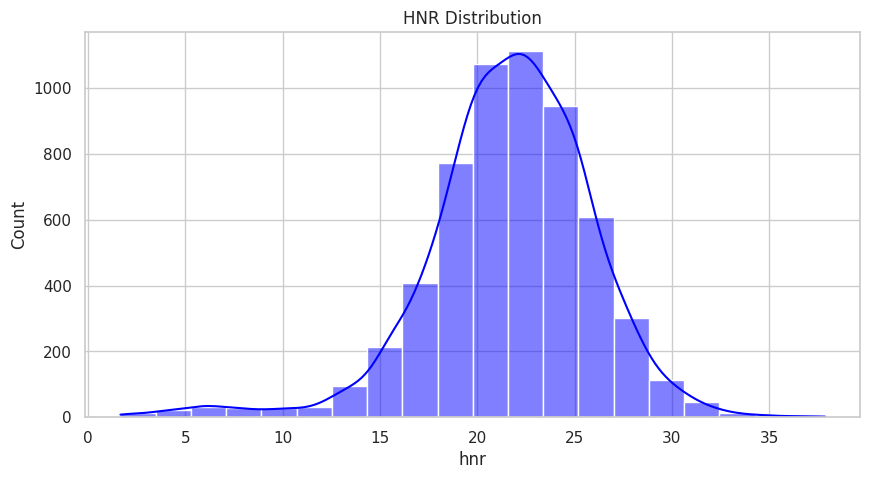

In [37]:
### 27. Histogram - HNR
plt.figure(figsize=figsize)
sns.histplot(df["hnr"], bins=20, kde=True, color="blue")
plt.title("HNR Distribution")
plt.show()

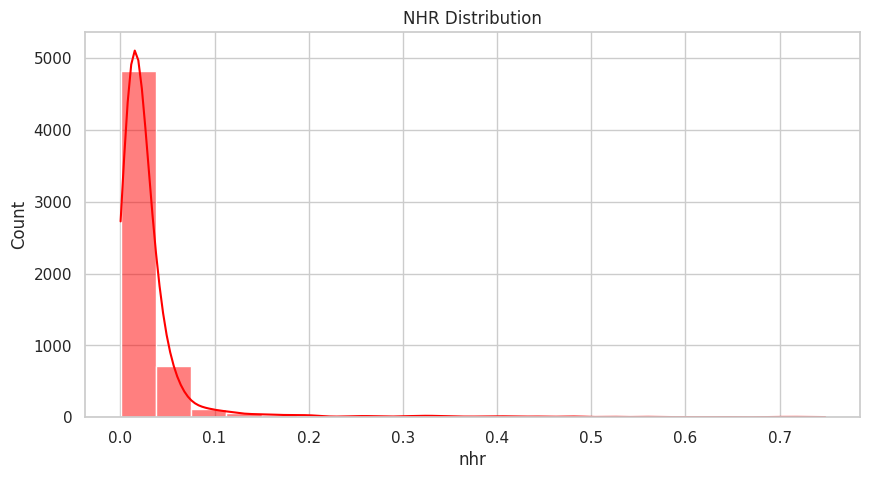

In [38]:
### 28. Histogram - NHR
plt.figure(figsize=figsize)
sns.histplot(df["nhr"], bins=20, kde=True, color="red")
plt.title("NHR Distribution")
plt.show()

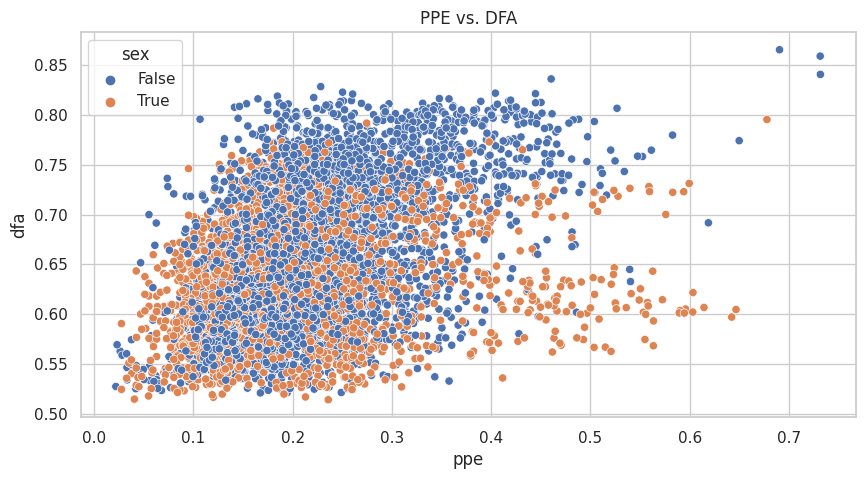

In [39]:
### 29. Scatterplot - PPE vs. DFA
plt.figure(figsize=figsize)
sns.scatterplot(x="ppe", y="dfa", hue="sex", data=df)
plt.title("PPE vs. DFA")
plt.show()

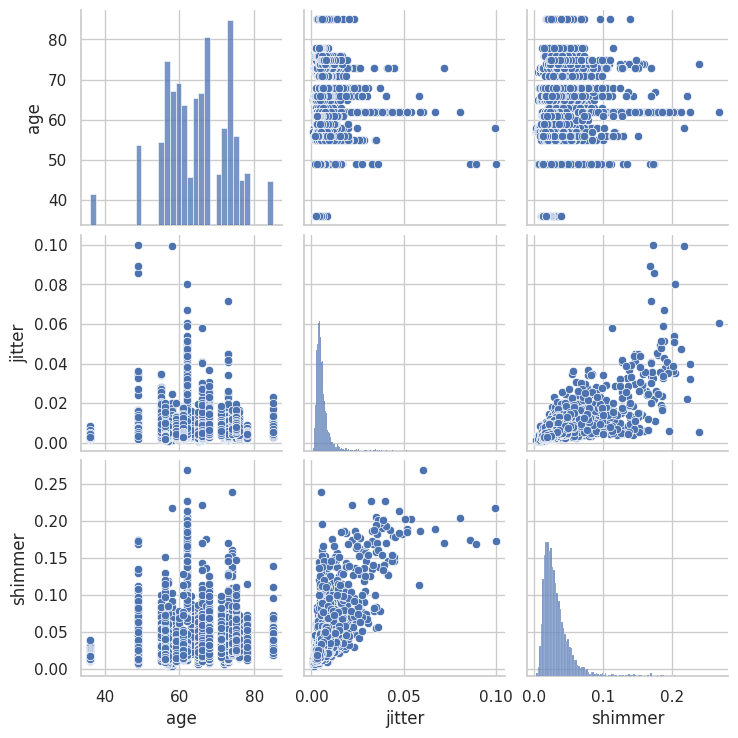

In [40]:
### 30. Pairplot - Age, Jitter, and Shimmer
sns.pairplot(df[["age", "jitter", "shimmer"]])
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


In [42]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Convert 'sex' column to numerical values (assuming 'False' and 'True' are categories)
df['sex'] = le.fit_transform(df['sex'])

In [43]:
# 5. Define Features and Target
X = df.drop(columns=["motor_updrs"])
y = df["motor_updrs"]

# 6. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
# 8. Define Regression Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor()
}

In [45]:
# 9. Train & Evaluate Models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R2 Score": r2, "MAE": mae}

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4660
[LightGBM] [Info] Number of data points in the train set: 4700, number of used features: 21
[LightGBM] [Info] Start training from score 21.332631


                       RMSE  R2 Score       MAE
Linear Regression  2.438317  0.906855  1.877150
Ridge Regression   2.437000  0.906955  1.876201
Lasso Regression   2.724281  0.883726  2.203985
ElasticNet         3.819243  0.771474  3.259047
Decision Tree      0.267428  0.998880  0.059578
Random Forest      0.185948  0.999458  0.102703
Gradient Boosting  0.963434  0.985458  0.716992
AdaBoost           1.874958  0.944924  1.570447
XGBoost            0.219501  0.999245  0.150236
LightGBM           0.275817  0.998808  0.204349


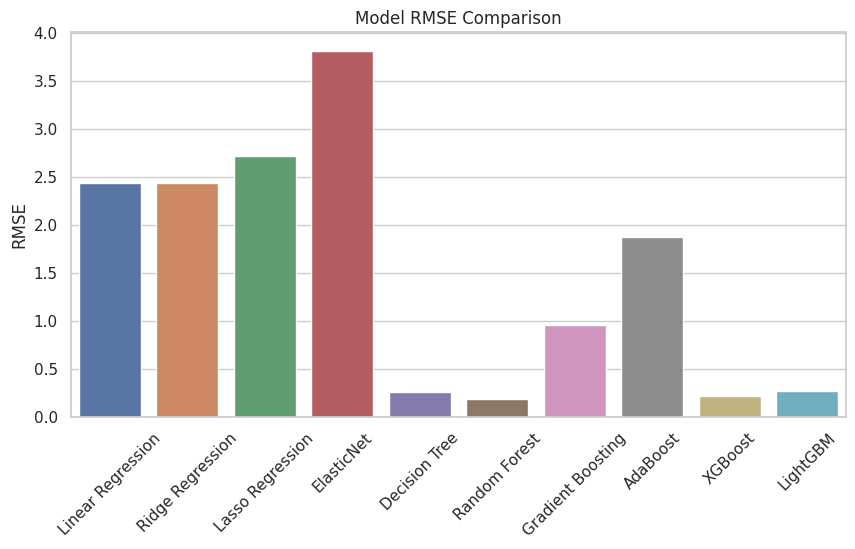

In [46]:
# 10. Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

# 11. Visualize Model Performance
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x=results_df.index, y="RMSE")
plt.xticks(rotation=45)
plt.title("Model RMSE Comparison")
plt.show()


In [47]:
# 12. Best Model Selection
best_model = min(results, key=lambda k: results[k]["RMSE"])
print(f"Best Model: {best_model} with RMSE: {results[best_model]['RMSE']}")

Best Model: Random Forest with RMSE: 0.18594806456766216




---

## 🧑🏻‍💻 About the Author  
**Name:** Arif Miah  

🎓 **Profession:** Machine Learning Engineer & Data Scientist  

---

### 🔭 **Career Objective**  
🚀 My goal is to contribute to groundbreaking advancements in artificial intelligence and data science, empowering companies and individuals with data-driven solutions. I strive to simplify complex challenges, craft innovative projects, and pave the way for a smarter and more connected future.  

🔍 As a **Machine Learning Engineer** and **Data Scientist**, I am passionate about using machine learning, deep learning, computer vision, and advanced analytics to solve real-world problems. My expertise lies in delivering impactful solutions by leveraging cutting-edge technologies.  

---

### 💻 **Skills**  
- 🤖 **Artificial Intelligence & Machine Learning**  
- 👁️‍🗨️ **Computer Vision & Predictive Analytics**  
- 🧠 **Deep Learning & Natural Language Processing (NLP)**  
- 🐍 **Python Programming & Automation**  
- 📊 **Data Visualization & Analysis**  
- 🚀 **End-to-End Model Development & Deployment**  

---

### 🚧 **Featured Projects**  

📊 **Lung Cancer Prediction with Deep Learning**  
Achieved 99% accuracy in a computer vision project using 12,000 medical images across three classes. This project involved data preprocessing, visualization, and model training to detect cancer effectively.  

🌾 **Ghana Crop Disease Detection Challenge**  
Developed a model using annotated images to identify crop diseases with bounding boxes, addressing real-world agricultural challenges and disease mitigation.  

🛡️ **Global Plastic Waste Analysis**  
Utilized GeoPandas, Matplotlib, and machine learning models like RandomForestClassifier and CatBoostClassifier to analyze trends in plastic waste management.  

🎵 **Twitter Emotion Classification**  
Performed exploratory data analysis and built a hybrid machine learning model to classify Twitter sentiments, leveraging text data preprocessing and visualization techniques.  

---

### ⚙️ **Technical Skills**  

- 💻 **Programming Languages:** Python 🐍, SQL 🗃️, R 📈  
- 📊 **Data Visualization Tools:** Matplotlib 📉, Seaborn 🌊, Tableau 📊, Power BI 📊  
- 🧠 **Machine Learning & Deep Learning:** Scikit-learn 🤖, TensorFlow 🔥, PyTorch 🧩  
- 🗂️ **Big Data Technologies:** Hadoop 🏗️, Spark ⚡  
- 🚀 **Model Deployment:** Flask 🌐, FastAPI ⚡, Docker 🐳  

---

### 🌐 **Connect with Me**  

📧 **Email:** arifmiahcse@gmail.com 

🔗 **LinkedIn:** [www.linkedin.com/in/arif-miah-8751bb217](#)  

🐱 **GitHub:** [https://github.com/Arif-miad](#)  

 

